# Applying CLIP model

In [1]:
import os
import matplotlib.pyplot as plt
import clip
import torch
from torchvision.datasets import CIFAR100
#from torchvision.datasets import CocoDetection
import numpy as np
import PIL
%matplotlib inline

#Had OpenMPI issue
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%load_ext autoreload
%autoreload 2

## First test with constellation image

In [2]:
# Load constellations
from dataUtils import * 
pictures = loadConstellations(pictureTypes=["original", "final_easy", "outline"])

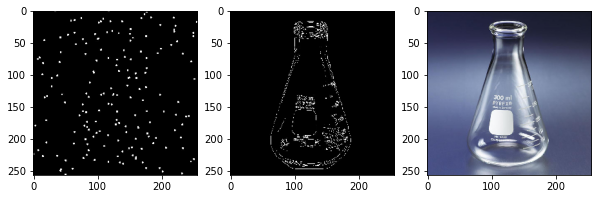

In [3]:
### Visualize selected image and its original
imageIdx = 24
objectId = list(pictures.keys())[imageIdx]
constellationImage = pictures[objectId]["final_easy"][0]
outlineImage = pictures[objectId]["outline"][0]
originalImage = pictures[objectId]["original"][0]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
ax1.imshow(constellationImage)
ax2.imshow(outlineImage)
ax3.imshow(originalImage)

In [4]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
#Different architectures, choose one
model, preprocess = clip.load('ViT-B/32', device) #Faster
#model, preprocess = clip.load('RN50x4', device) #Better but takes more time


In [5]:
# Download the dataset (not necessary, as only interested in classes)
#cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)
#Coco = CocoDetection(root=os.path.expanduser("~/.cache"), download=True, train=False)

In [6]:
#Available classifications from different datasets
#combinedClasses.txt - CoCo + CIFAR100 (around 160 classes, removed duplicates)
#combinedClassesAdditional.txt -CoCo + CIFAR100 + classes about pictures which constellations are in set but 
#not in either CoCo or CIFAR100 classes (around 180 classes, removed duplicates)
#cocoClasses.txt - CoCo (80 classes)
#cifarClasses.txt - Cifar100 (100 classes)
#imagenet_classes.txt - Imagenet classes (around 1000 classes)

chosenDataset = "combinedClassesAdditional.txt"
# Read the categories
with open(os.path.join("classes",chosenDataset), "r") as f:
    categories = [s.strip() for s in f.readlines()]

object_413


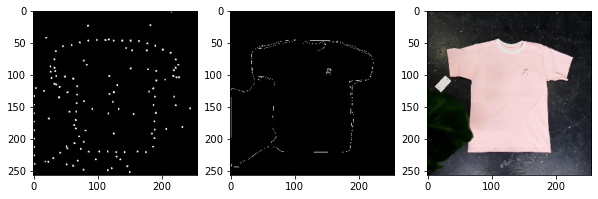

final_easy

Top predictions for final_easy :

           plain: 5.57%
         giraffe: 2.75%
             sea: 2.74%
             ray: 2.52%
           plate: 2.51%
outline

Top predictions for outline :

           shirt: 70.91%
          person: 1.83%
           plain: 1.46%
      lawn_mower: 1.25%
          cattle: 1.17%
original

Top predictions for original :

           shirt: 99.19%
           plain: 0.07%
            baby: 0.05%
             tie: 0.03%
             boy: 0.03%
object_451


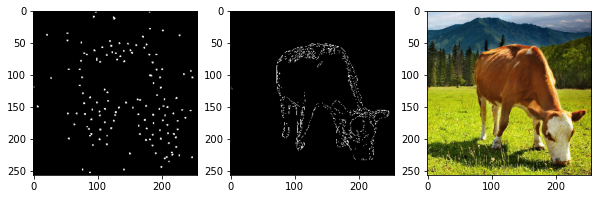

final_easy

Top predictions for final_easy :

           plain: 7.78%
             sea: 4.76%
      cell phone: 3.35%
           plate: 2.98%
            kite: 1.95%
outline

Top predictions for outline :

          cattle: 76.21%
             cow: 17.47%
           sheep: 2.20%
            bear: 0.84%
      lawn_mower: 0.65%
original

Top predictions for original :

             cow: 58.27%
          cattle: 40.77%
           horse: 0.37%
      lawn_mower: 0.26%
         tractor: 0.07%
object_244


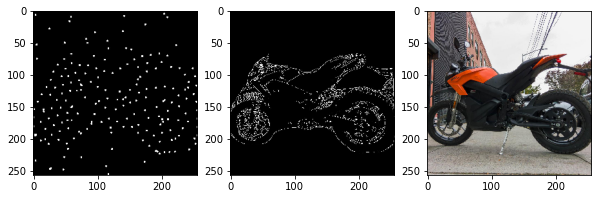

final_easy

Top predictions for final_easy :

           plain: 8.69%
             sea: 5.78%
      cell phone: 3.03%
           plate: 2.53%
             ray: 2.39%
outline

Top predictions for outline :

      motorcycle: 86.54%
      lawn_mower: 6.74%
         bicycle: 1.03%
             car: 0.63%
           mouse: 0.42%
original

Top predictions for original :

      motorcycle: 94.21%
          orange: 1.24%
         bicycle: 0.93%
          rocket: 0.51%
          carrot: 0.24%
object_338


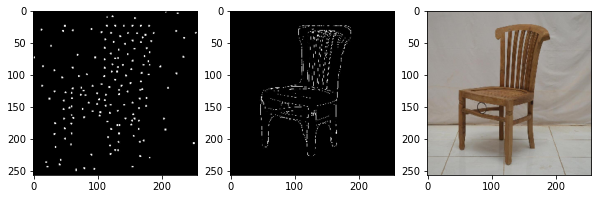

final_easy

Top predictions for final_easy :

           plain: 7.17%
           plate: 3.20%
             ray: 2.87%
     sports ball: 2.77%
     willow_tree: 2.57%
outline

Top predictions for outline :

           chair: 99.02%
           couch: 0.21%
           table: 0.15%
    dining table: 0.12%
           shirt: 0.06%
original

Top predictions for original :

           chair: 98.95%
           table: 0.31%
    dining table: 0.30%
           bench: 0.12%
           plain: 0.05%
object_196


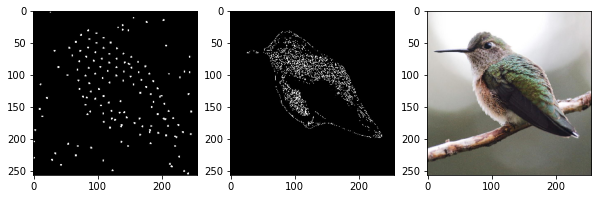

final_easy

Top predictions for final_easy :

           plain: 8.42%
             sea: 5.67%
           plate: 3.14%
            kite: 2.62%
      cell phone: 2.60%
outline

Top predictions for outline :

        flatfish: 22.15%
             ray: 21.25%
           whale: 10.03%
           trout: 4.86%
           mouse: 2.79%
original

Top predictions for original :

            bird: 90.86%
            baby: 1.71%
             boy: 1.08%
    sweet_pepper: 0.64%
            girl: 0.47%
object_345


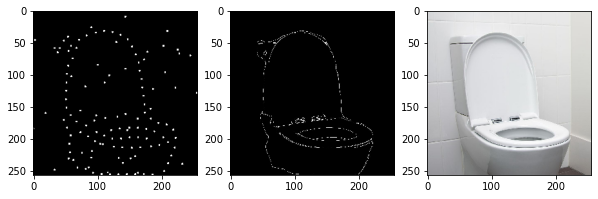

final_easy

Top predictions for final_easy :

           plain: 12.00%
             sea: 6.10%
      cell phone: 3.32%
        mountain: 2.19%
         giraffe: 2.17%
outline

Top predictions for outline :

            pear: 10.29%
            baby: 4.90%
            duck: 4.56%
          person: 3.43%
          beaker: 3.16%
original

Top predictions for original :

          toilet: 96.84%
           chair: 1.78%
            sink: 0.25%
           plain: 0.12%
            bowl: 0.11%
object_452


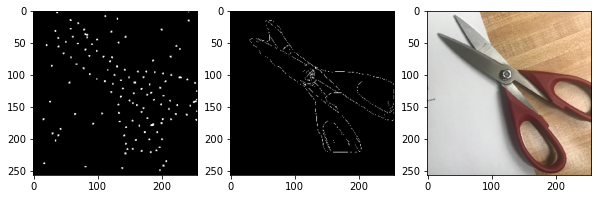

final_easy

Top predictions for final_easy :

           plain: 6.87%
           plate: 4.35%
             ray: 3.85%
            kite: 3.25%
         frisbee: 2.75%
outline

Top predictions for outline :

          pistol: 34.63%
          wrench: 5.27%
            kite: 5.07%
             ray: 5.04%
           whale: 4.35%
original

Top predictions for original :

        scissors: 96.84%
           knife: 2.18%
             pen: 0.46%
          wrench: 0.21%
            fork: 0.07%
object_385


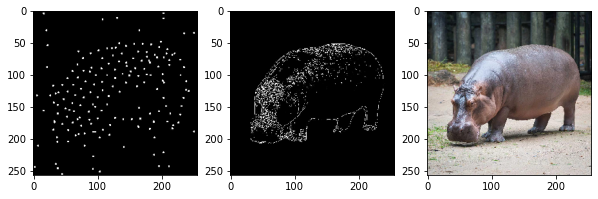

final_easy

Top predictions for final_easy :

             sea: 8.36%
           plain: 5.84%
      cell phone: 3.14%
            kite: 3.10%
           plate: 2.75%
outline

Top predictions for outline :

            bear: 28.88%
          beaver: 13.10%
           sheep: 9.59%
        elephant: 7.32%
           mouse: 5.55%
original

Top predictions for original :

           hippo: 99.73%
             cow: 0.05%
        elephant: 0.03%
            bear: 0.02%
           horse: 0.02%
object_339


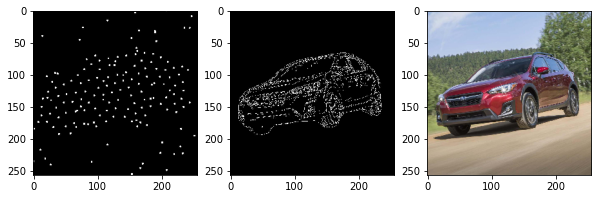

final_easy

Top predictions for final_easy :

           plain: 6.64%
             sea: 5.13%
           plate: 3.60%
      cell phone: 3.34%
            kite: 3.08%
outline

Top predictions for outline :

             car: 87.14%
    pickup_truck: 1.80%
           shirt: 0.84%
           truck: 0.67%
          beetle: 0.49%
original

Top predictions for original :

             car: 67.87%
    pickup_truck: 2.73%
            baby: 2.46%
           truck: 2.21%
        dinosaur: 1.77%
object_322


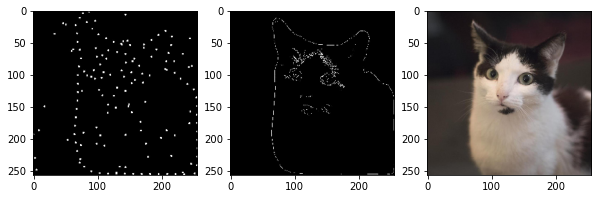

final_easy

Top predictions for final_easy :

           plain: 6.27%
             sea: 3.02%
           whale: 2.71%
             ray: 2.55%
      cell phone: 2.42%
outline

Top predictions for outline :

             cat: 52.50%
             dog: 3.08%
            bear: 2.47%
           tiger: 2.14%
    sweet_pepper: 1.95%
original

Top predictions for original :

             cat: 56.39%
    sweet_pepper: 29.83%
             boy: 2.51%
           mouse: 1.16%
            baby: 1.13%
object_453


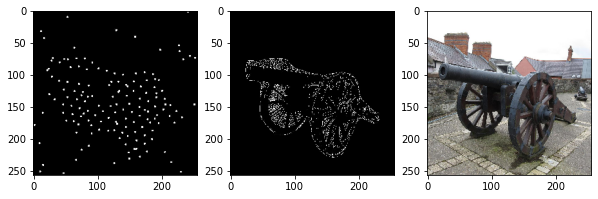

final_easy

Top predictions for final_easy :

           plain: 7.64%
             sea: 4.98%
           plate: 3.51%
      cell phone: 3.18%
         frisbee: 2.88%
outline

Top predictions for outline :

      lawn_mower: 22.05%
        elephant: 13.40%
          cattle: 8.32%
             cow: 4.78%
           sheep: 4.73%
original

Top predictions for original :

          cannon: 99.71%
          pistol: 0.06%
            tank: 0.05%
      hair drier: 0.03%
          castle: 0.02%
object_369


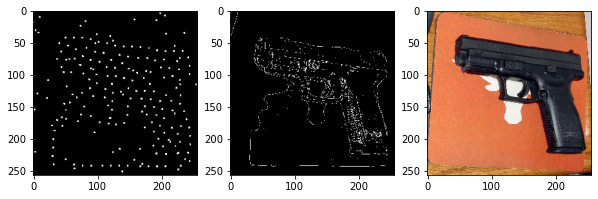

final_easy

Top predictions for final_easy :

             sea: 7.82%
           plain: 6.83%
      cell phone: 3.43%
           plate: 2.89%
             cup: 2.34%
outline

Top predictions for outline :

          pistol: 90.71%
          wrench: 0.84%
      lawn_mower: 0.77%
          remote: 0.71%
       telephone: 0.61%
original

Top predictions for original :

          pistol: 98.41%
            cake: 0.49%
        backpack: 0.14%
            book: 0.08%
           plate: 0.07%
object_468


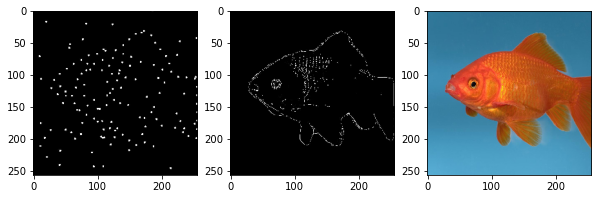

final_easy

Top predictions for final_easy :

           plain: 9.63%
             sea: 3.42%
      cell phone: 3.38%
           plate: 2.62%
        mountain: 2.25%
outline

Top predictions for outline :

   aquarium fish: 44.84%
           shark: 17.98%
        flatfish: 8.24%
             ray: 7.70%
           whale: 6.59%
original

Top predictions for original :

        goldfish: 90.68%
   aquarium fish: 9.00%
           trout: 0.15%
          orange: 0.02%
    sweet_pepper: 0.02%
object_448


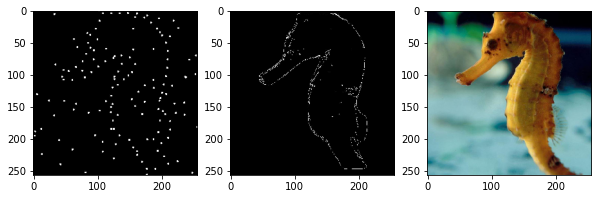

final_easy

Top predictions for final_easy :

           plain: 11.86%
             sea: 10.10%
      cell phone: 3.17%
           plate: 2.13%
        mountain: 2.12%
outline

Top predictions for outline :

           horse: 15.86%
             dog: 10.89%
        seahorse: 9.33%
            bear: 6.50%
          cattle: 5.39%
original

Top predictions for original :

        seahorse: 99.96%
   aquarium fish: 0.01%
     caterpillar: 0.01%
        goldfish: 0.01%
            worm: 0.00%
object_266


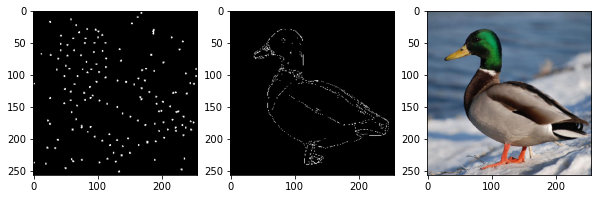

final_easy

Top predictions for final_easy :

           plain: 10.58%
             sea: 9.95%
      cell phone: 2.89%
             cup: 2.45%
           plate: 2.17%
outline

Top predictions for outline :

            duck: 64.92%
         penguin: 19.06%
            bird: 8.85%
         snowman: 0.59%
           plain: 0.44%
original

Top predictions for original :

            duck: 98.21%
            bird: 0.99%
             boy: 0.07%
          person: 0.07%
             man: 0.07%
object_230


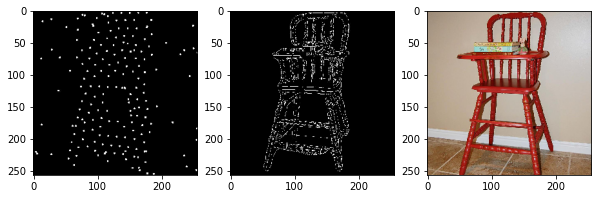

final_easy

Top predictions for final_easy :

             sea: 8.82%
           plain: 7.83%
      cell phone: 4.11%
           plate: 2.38%
             ray: 2.17%
outline

Top predictions for outline :

           chair: 98.16%
           table: 0.49%
    dining table: 0.48%
           shirt: 0.14%
           bench: 0.05%
original

Top predictions for original :

           chair: 97.36%
           table: 0.71%
    dining table: 0.47%
fire extinguisher: 0.34%
           bench: 0.22%
object_263


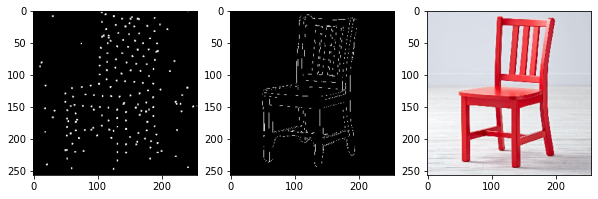

final_easy

Top predictions for final_easy :

           plain: 6.38%
     sports ball: 4.04%
      cell phone: 4.04%
       pine_tree: 3.60%
     willow_tree: 3.08%
outline

Top predictions for outline :

           chair: 99.32%
           couch: 0.15%
      television: 0.07%
            vase: 0.05%
           table: 0.04%
original

Top predictions for original :

           chair: 98.79%
           table: 0.63%
    dining table: 0.21%
           plain: 0.03%
             cup: 0.02%
object_471


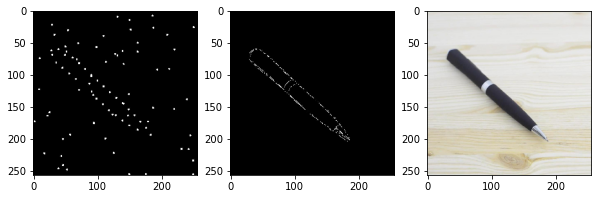

final_easy

Top predictions for final_easy :

           plain: 7.04%
      cell phone: 3.78%
             sea: 3.56%
           plate: 2.69%
             ray: 2.17%
outline

Top predictions for outline :

            fork: 8.19%
             pen: 4.64%
            skis: 4.51%
      toothbrush: 4.16%
   tennis racket: 4.08%
original

Top predictions for original :

             pen: 99.65%
           knife: 0.05%
           plain: 0.04%
    baseball bat: 0.04%
           table: 0.02%
object_473


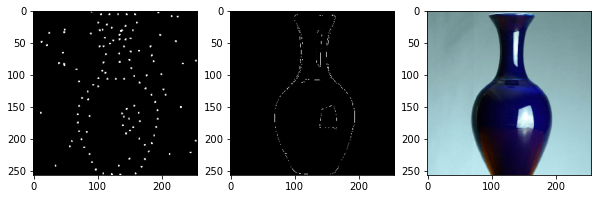

final_easy

Top predictions for final_easy :

           plain: 9.14%
             sea: 4.90%
      cell phone: 4.08%
           plate: 2.36%
             ray: 2.06%
outline

Top predictions for outline :

          bottle: 48.05%
            vase: 42.12%
      wine glass: 3.10%
          beaker: 1.73%
           flask: 1.08%
original

Top predictions for original :

            vase: 96.05%
          bottle: 1.36%
          beaker: 1.05%
      wine glass: 0.89%
            bowl: 0.17%
object_457


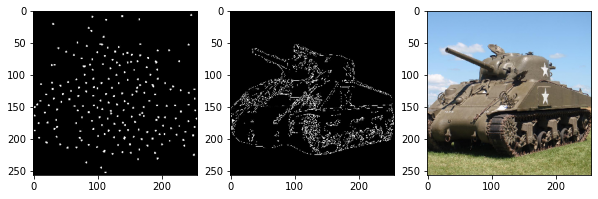

final_easy

Top predictions for final_easy :

           plain: 8.85%
             sea: 5.98%
      cell phone: 3.76%
           plate: 2.86%
       pine_tree: 2.44%
outline

Top predictions for outline :

      lawn_mower: 39.14%
      motorcycle: 14.91%
           mouse: 4.53%
    pickup_truck: 4.12%
            tank: 3.61%
original

Top predictions for original :

            tank: 98.10%
           tiger: 0.78%
          cannon: 0.27%
      lawn_mower: 0.13%
         tractor: 0.12%
object_412


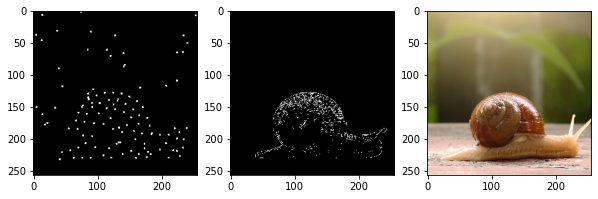

final_easy

Top predictions for final_easy :

           plain: 9.46%
             sea: 4.89%
       pine_tree: 3.22%
      cell phone: 3.03%
           plate: 2.53%
outline

Top predictions for outline :

          turtle: 10.56%
           shrew: 9.11%
           mouse: 8.45%
           snail: 6.66%
        dinosaur: 5.86%
original

Top predictions for original :

           snail: 98.49%
            worm: 0.77%
     caterpillar: 0.15%
           snake: 0.13%
       cockroach: 0.07%
object_411


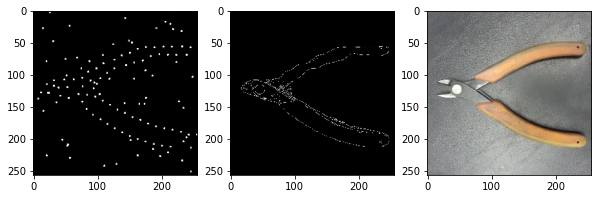

final_easy

Top predictions for final_easy :

           plain: 7.48%
             sea: 4.56%
      cell phone: 3.35%
           plate: 2.96%
     sports ball: 2.49%
outline

Top predictions for outline :

             ray: 16.86%
            kite: 7.57%
        flatfish: 6.71%
           whale: 4.95%
            hand: 4.38%
original

Top predictions for original :

        scissors: 87.02%
            worm: 2.41%
           knife: 2.10%
          wrench: 1.47%
           spoon: 1.29%
object_409


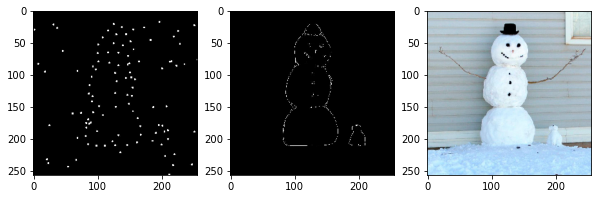

final_easy

Top predictions for final_easy :

           plain: 10.91%
             sea: 3.59%
           plate: 3.52%
      cell phone: 3.22%
            kite: 2.65%
outline

Top predictions for outline :

         snowman: 98.92%
         penguin: 0.26%
      teddy bear: 0.12%
            bear: 0.09%
             cat: 0.06%
original

Top predictions for original :

         snowman: 99.81%
    fire hydrant: 0.03%
            skis: 0.03%
       snowboard: 0.01%
          person: 0.01%
object_351


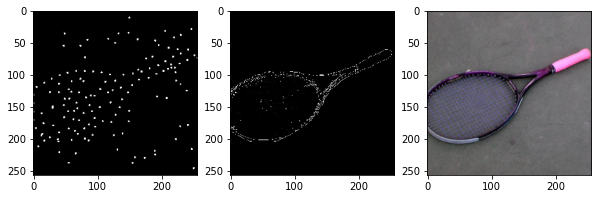

final_easy

Top predictions for final_easy :

           plain: 7.16%
             sea: 5.95%
           plate: 3.52%
     sports ball: 3.15%
      cell phone: 3.09%
outline

Top predictions for outline :

           spoon: 77.01%
            fork: 5.00%
            bowl: 4.38%
        flatfish: 1.21%
           plate: 0.92%
original

Top predictions for original :

   tennis racket: 99.80%
     sports ball: 0.08%
    baseball bat: 0.03%
         frisbee: 0.01%
       cockroach: 0.01%
object_432


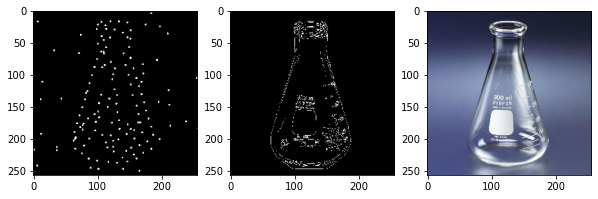

final_easy

Top predictions for final_easy :

           plain: 9.05%
             sea: 4.46%
      cell phone: 4.00%
         giraffe: 2.36%
           plate: 2.17%
outline

Top predictions for outline :

          bottle: 69.53%
            lamp: 7.94%
          beaker: 5.22%
fire extinguisher: 2.38%
            vase: 2.29%
original

Top predictions for original :

          beaker: 72.67%
          bottle: 20.34%
      wine glass: 3.59%
            vase: 0.95%
           flask: 0.80%
object_440


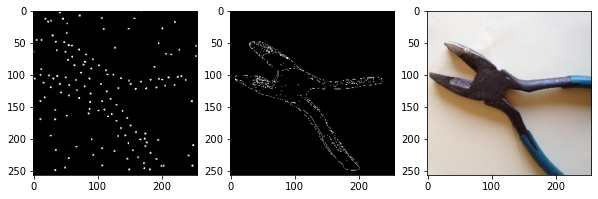

final_easy

Top predictions for final_easy :

           plain: 9.61%
             sea: 6.16%
      cell phone: 3.46%
           plate: 3.09%
         giraffe: 2.29%
outline

Top predictions for outline :

            hand: 36.10%
          wrench: 8.19%
  baseball glove: 6.49%
          pistol: 5.07%
            kite: 3.64%
original

Top predictions for original :

        scissors: 68.17%
          wrench: 22.59%
           knife: 1.60%
           spoon: 1.06%
            fork: 1.04%
object_341


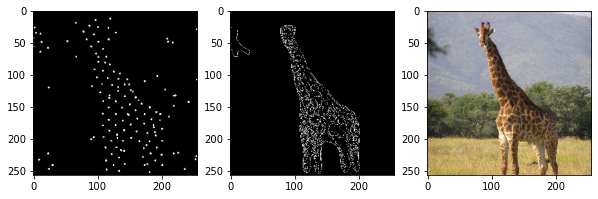

final_easy

Top predictions for final_easy :

           plain: 8.38%
      cell phone: 5.01%
             sea: 4.19%
           plate: 3.44%
     sports ball: 3.01%
outline

Top predictions for outline :

         giraffe: 41.06%
           camel: 21.27%
             dog: 8.90%
        dinosaur: 4.87%
           horse: 3.80%
original

Top predictions for original :

         giraffe: 99.41%
           zebra: 0.18%
           camel: 0.11%
         leopard: 0.07%
        elephant: 0.04%
object_243


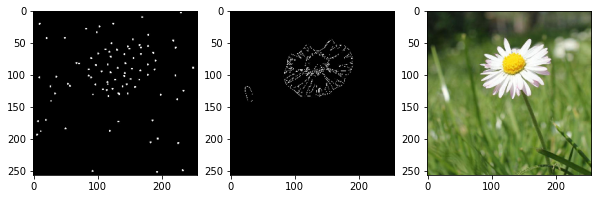

final_easy

Top predictions for final_easy :

           plain: 9.48%
           plate: 2.96%
      cell phone: 2.90%
             sea: 2.74%
            kite: 2.10%
outline

Top predictions for outline :

     sports ball: 5.03%
          spider: 4.72%
          flower: 4.47%
           plate: 2.34%
         frisbee: 2.25%
original

Top predictions for original :

          flower: 70.33%
           plain: 10.97%
      lawn_mower: 3.32%
            girl: 1.77%
       sunflower: 1.16%
object_442


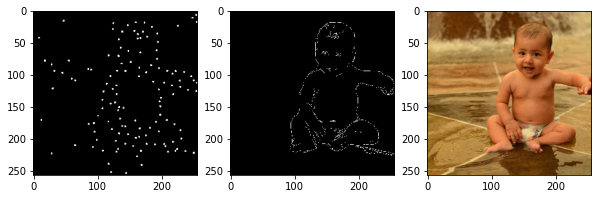

final_easy

Top predictions for final_easy :

           plain: 9.58%
             sea: 4.74%
      cell phone: 3.41%
       pine_tree: 2.85%
           plate: 2.48%
outline

Top predictions for outline :

      teddy bear: 22.31%
          person: 12.17%
             boy: 10.94%
            bear: 4.65%
         snowman: 2.58%
original

Top predictions for original :

            baby: 54.11%
             boy: 32.85%
           hippo: 1.50%
        goldfish: 1.01%
          person: 0.94%
object_201


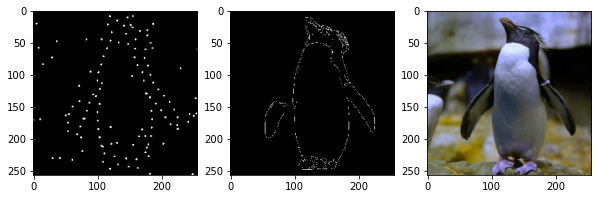

final_easy

Top predictions for final_easy :

           plain: 9.45%
             sea: 5.69%
      cell phone: 3.13%
           plate: 2.41%
        mountain: 2.30%
outline

Top predictions for outline :

         penguin: 97.70%
           whale: 0.44%
            seal: 0.14%
            bird: 0.08%
           plain: 0.08%
original

Top predictions for original :

         penguin: 98.03%
   aquarium fish: 0.49%
            duck: 0.23%
            bird: 0.22%
            seal: 0.17%
object_419


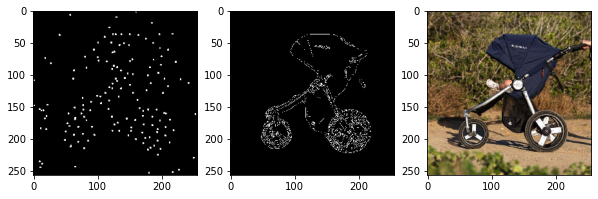

final_easy

Top predictions for final_easy :

           plain: 8.33%
             sea: 5.44%
      cell phone: 3.53%
           plate: 3.11%
            kite: 2.34%
outline

Top predictions for outline :

         bicycle: 78.28%
      motorcycle: 8.70%
      lawn_mower: 2.65%
           shirt: 1.38%
      skateboard: 0.59%
original

Top predictions for original :

         bicycle: 36.17%
            baby: 13.30%
        backpack: 12.58%
        umbrella: 9.98%
            kite: 3.99%
object_324


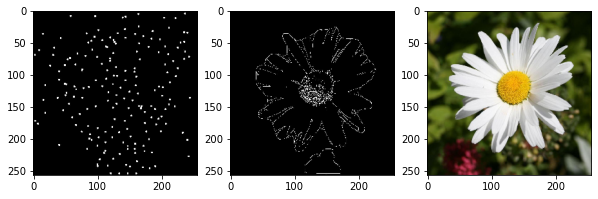

final_easy

Top predictions for final_easy :

             sea: 12.73%
           plain: 8.57%
      cell phone: 3.61%
             ray: 2.43%
           plate: 2.08%
outline

Top predictions for outline :

          flower: 36.62%
       sunflower: 21.24%
           poppy: 11.75%
            rose: 6.79%
           clock: 2.05%
original

Top predictions for original :

          flower: 82.64%
       sunflower: 2.99%
           plain: 2.19%
             bee: 1.88%
    potted plant: 1.26%
object_206


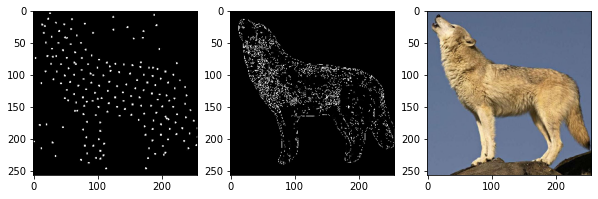

final_easy

Top predictions for final_easy :

           plain: 8.54%
             sea: 7.38%
      cell phone: 3.40%
           plate: 2.58%
             ray: 1.98%
outline

Top predictions for outline :

             dog: 21.70%
            wolf: 21.04%
            bear: 12.62%
          cattle: 7.41%
             cow: 4.74%
original

Top predictions for original :

            wolf: 98.92%
             dog: 0.53%
             fox: 0.28%
            lion: 0.02%
           woman: 0.02%
object_478


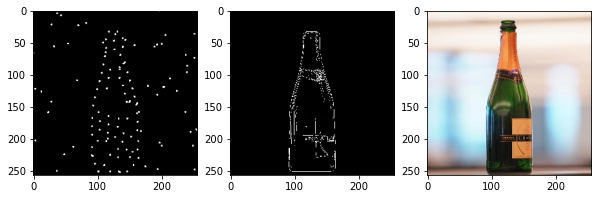

final_easy

Top predictions for final_easy :

           plain: 8.43%
           plate: 2.98%
      cell phone: 2.95%
     sports ball: 2.24%
            kite: 2.24%
outline

Top predictions for outline :

          bottle: 88.35%
fire extinguisher: 1.16%
           flask: 1.11%
             can: 0.71%
      wine glass: 0.71%
original

Top predictions for original :

          bottle: 88.12%
      wine glass: 3.82%
          beaker: 0.63%
           table: 0.39%
             cup: 0.34%
object_449


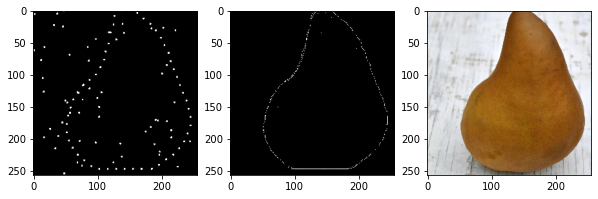

final_easy

Top predictions for final_easy :

           plain: 8.53%
             sea: 5.03%
      cell phone: 3.36%
           plate: 2.93%
         giraffe: 1.95%
outline

Top predictions for outline :

            pear: 32.99%
          beaker: 9.54%
      wine glass: 3.67%
            vase: 3.41%
           plain: 2.74%
original

Top predictions for original :

            pear: 99.87%
           apple: 0.03%
          orange: 0.03%
    sweet_pepper: 0.01%
           spoon: 0.01%
object_234


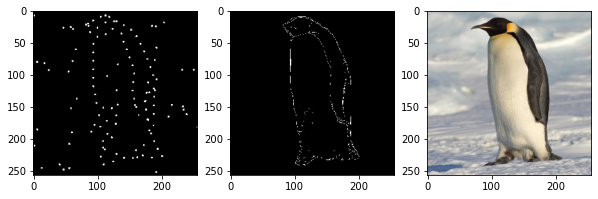

final_easy

Top predictions for final_easy :

           plain: 9.33%
             sea: 4.56%
      cell phone: 3.38%
         giraffe: 3.26%
             ray: 2.60%
outline

Top predictions for outline :

         penguin: 19.96%
            bear: 7.81%
          beaver: 7.23%
      chimpanzee: 5.78%
           skunk: 5.61%
original

Top predictions for original :

         penguin: 99.23%
            seal: 0.14%
            bird: 0.07%
         snowman: 0.05%
           plain: 0.04%
object_256


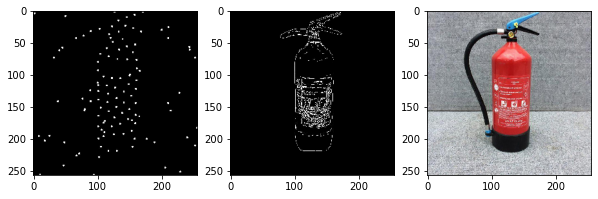

final_easy

Top predictions for final_easy :

           plain: 7.54%
             sea: 5.82%
      cell phone: 2.80%
           plate: 2.73%
         frisbee: 1.91%
outline

Top predictions for outline :

          bottle: 79.98%
fire extinguisher: 4.13%
             can: 3.54%
            vase: 2.69%
           flask: 1.96%
original

Top predictions for original :

fire extinguisher: 99.72%
    fire hydrant: 0.23%
             can: 0.02%
          bottle: 0.02%
           flask: 0.00%
object_439


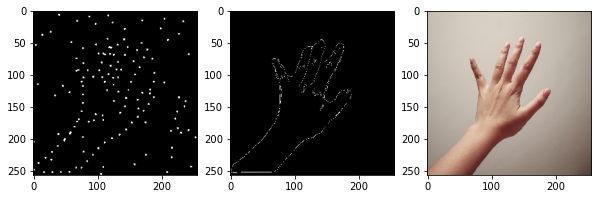

final_easy

Top predictions for final_easy :

             sea: 7.45%
           plain: 7.17%
            kite: 3.68%
           plate: 2.81%
      cell phone: 2.19%
outline

Top predictions for outline :

            hand: 68.21%
          pistol: 3.40%
          person: 2.99%
  baseball glove: 2.62%
          beaker: 2.34%
original

Top predictions for original :

            hand: 94.87%
           woman: 0.81%
          person: 0.73%
            girl: 0.55%
           plain: 0.34%
object_410


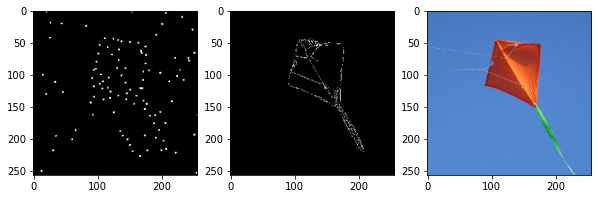

final_easy

Top predictions for final_easy :

           plain: 8.57%
             sea: 5.26%
           plate: 2.64%
            kite: 2.32%
      cell phone: 2.15%
outline

Top predictions for outline :

            kite: 9.03%
            fork: 7.50%
             tie: 6.84%
        umbrella: 6.55%
          wrench: 6.48%
original

Top predictions for original :

            kite: 99.79%
           plain: 0.05%
        umbrella: 0.03%
             ray: 0.02%
          rocket: 0.02%
object_229


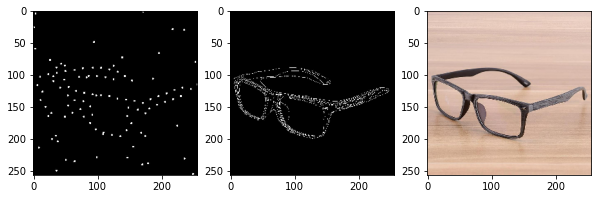

final_easy

Top predictions for final_easy :

           plain: 9.44%
             sea: 6.99%
      cell phone: 3.21%
        mountain: 2.42%
         giraffe: 2.39%
outline

Top predictions for outline :

      sunglasses: 96.10%
           plain: 0.27%
           shirt: 0.22%
           snake: 0.17%
             tie: 0.15%
original

Top predictions for original :

      sunglasses: 97.65%
           plain: 0.93%
             tie: 0.20%
          person: 0.09%
           shirt: 0.06%
object_248


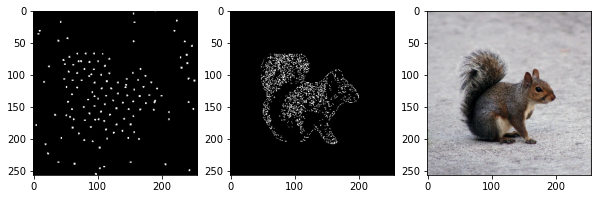

final_easy

Top predictions for final_easy :

           plain: 7.37%
             sea: 4.47%
      cell phone: 3.07%
            kite: 2.84%
           plate: 2.76%
outline

Top predictions for outline :

            bear: 21.96%
           skunk: 15.89%
         leopard: 7.52%
           mouse: 5.79%
             cat: 4.79%
original

Top predictions for original :

        squirrel: 99.06%
    sweet_pepper: 0.18%
           skunk: 0.08%
           mouse: 0.08%
            baby: 0.06%
object_391


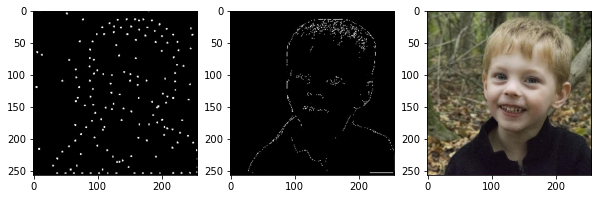

final_easy

Top predictions for final_easy :

           plain: 8.69%
             sea: 8.55%
      cell phone: 3.59%
           plate: 2.35%
             cup: 2.11%
outline

Top predictions for outline :

             boy: 48.06%
          person: 26.25%
             man: 4.03%
           plain: 1.80%
            baby: 1.20%
original

Top predictions for original :

             boy: 92.27%
            baby: 2.90%
          person: 2.13%
             man: 0.50%
        dinosaur: 0.15%
object_447


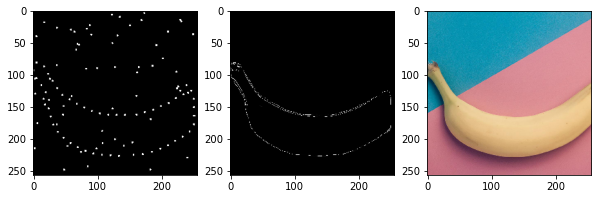

final_easy

Top predictions for final_easy :

           plain: 11.46%
             sea: 4.23%
      cell phone: 3.65%
           plate: 2.98%
        mountain: 2.15%
outline

Top predictions for outline :

            worm: 10.66%
           whale: 8.50%
           snake: 3.94%
        scissors: 3.37%
      sunglasses: 3.29%
original

Top predictions for original :

          banana: 98.87%
           plain: 0.15%
           spoon: 0.14%
           apple: 0.06%
            cake: 0.05%
object_463


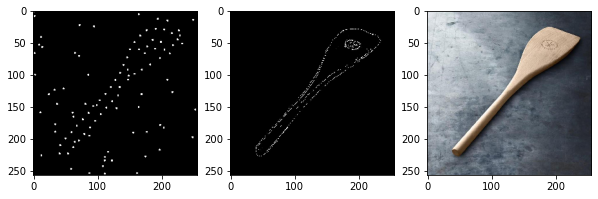

final_easy

Top predictions for final_easy :

           plain: 7.86%
             sea: 4.30%
           plate: 2.94%
             ray: 2.88%
            kite: 2.86%
outline

Top predictions for outline :

           spoon: 21.23%
   tennis racket: 13.83%
            fork: 7.21%
      toothbrush: 6.20%
        scissors: 5.98%
original

Top predictions for original :

           spoon: 43.86%
    baseball bat: 34.17%
   tennis racket: 4.92%
            skis: 3.80%
           knife: 3.11%
object_211


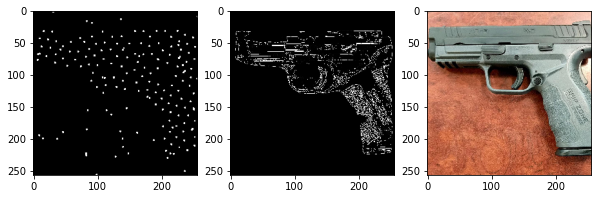

final_easy

Top predictions for final_easy :

           plain: 6.25%
             sea: 6.19%
            kite: 3.50%
      cell phone: 3.20%
             ray: 3.06%
outline

Top predictions for outline :

          pistol: 98.53%
    pickup_truck: 0.13%
          wrench: 0.11%
           shirt: 0.11%
      teddy bear: 0.05%
original

Top predictions for original :

          pistol: 98.43%
      teddy bear: 0.25%
            baby: 0.15%
        backpack: 0.10%
           mouse: 0.07%
object_367


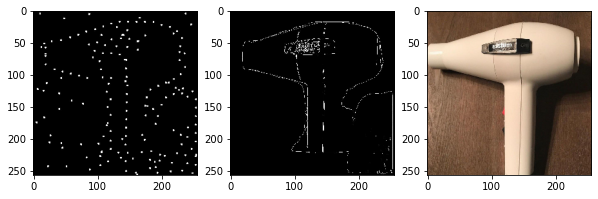

final_easy

Top predictions for final_easy :

           plain: 9.69%
             sea: 6.83%
      cell phone: 3.79%
             ray: 2.06%
           whale: 2.02%
outline

Top predictions for outline :

      hair drier: 9.57%
        elephant: 7.40%
       telephone: 4.52%
           camel: 3.76%
        dinosaur: 3.37%
original

Top predictions for original :

      hair drier: 99.92%
      toothbrush: 0.01%
          remote: 0.01%
            skis: 0.01%
         toaster: 0.00%
object_455


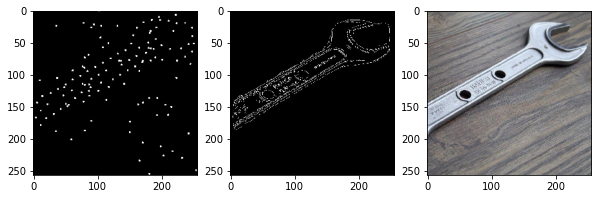

final_easy

Top predictions for final_easy :

             sea: 7.46%
           plain: 5.91%
             ray: 3.43%
            kite: 3.39%
           plate: 2.73%
outline

Top predictions for outline :

          wrench: 51.08%
          pistol: 31.79%
      hair drier: 1.79%
           knife: 1.26%
             pen: 1.10%
original

Top predictions for original :

          wrench: 99.50%
        scissors: 0.37%
           knife: 0.07%
           spoon: 0.02%
            fork: 0.01%
object_225


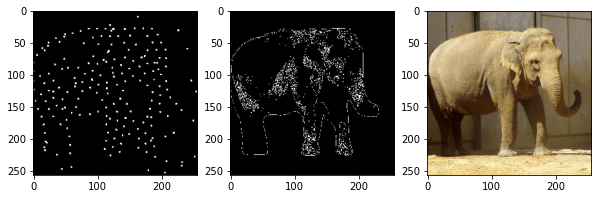

final_easy

Top predictions for final_easy :

             sea: 8.37%
           plain: 7.61%
      cell phone: 4.36%
           plate: 3.61%
            kite: 2.50%
outline

Top predictions for outline :

        elephant: 43.82%
             cow: 17.08%
          cattle: 13.67%
            bear: 12.04%
           hippo: 4.73%
original

Top predictions for original :

        elephant: 98.65%
           camel: 0.16%
         giraffe: 0.13%
            baby: 0.11%
            lion: 0.06%


In [8]:
# Prepare the inputs
#image, class_id = cifar100[3637]
n = len(pictures.keys())

for i in range(n):
    objectId = list(pictures.keys())[i]
    constellationImage = pictures[objectId]["final_easy"][-1]
    outlineImage = pictures[objectId]["outline"][0]
    originalImage = pictures[objectId]["original"][0]
    print(objectId)
    #print(labels[i])
    #print(labels[i] in categories)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
    axes[0].imshow(constellationImage)
    axes[1].imshow(outlineImage)
    axes[2].imshow(originalImage)
    plt.show()

    for image_type in ["final_easy","outline", "original"]:
        print(image_type)

#    for image_type in ["outline", "final_easy"]:

        image = PIL.Image.fromarray(pictures[objectId][image_type][0])
        image_input = preprocess(image).unsqueeze(0).to(device)
        text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in categories]).to(device)

        # Calculate features
        with torch.no_grad():
            image_features = model.encode_image(image_input)
            text_features = model.encode_text(text_inputs)

        # Pick the top 5 most similar labels for the image
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        values, indices = similarity[0].topk(5)

        # Print the result
        print("\nTop predictions for", image_type, ":\n")
        for value, index in zip(values, indices):
            print(f"{categories[index]:>16s}: {100 * value.item():.2f}%")
            
   

